# Poke Pandas
Data from: https://www.kaggle.com/rounakbanik/pokemon/data

Quick Pandas Tutorial: https://pandas.pydata.org/pandas-docs/stable/10min.html

Questions posed by author: 
* Is it possible to build a classifier to identify legendary Pokemon?
* How does height and weight of a Pokemon correlate with its various base stats?
* What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
* Which type is the strongest overall? Which is the weakest?
* Which type is the most likely to be a legendary Pokemon?
* Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

Task: Explore the data using SciPy and try to answer these questions and pose more. 

In [123]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/JuYeHPFR3f0" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

## Loading Libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

## Using Pandas to Load CSV Data

In [101]:
pokeData = pd.read_csv('..\Data\pokemon.csv')
pokeData.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [17]:
## 801 Rows, 41 Columns 
## 801 Pokemon, 41 Stats
pokeData.shape

(801, 41)

## Basic descriptive statistics of the columns. 

In [67]:
pokeData.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


## Let's explore the standard deviation of the class weaknesses. 

In [68]:
# type(stdOfAdvantage) == pandas.core.series.Series
stdOfAdvantage = pokeData.std()[0:18]
stdOfAdvantage.sort_values(inplace=True)
stdOfAdvantage

against_normal      0.266106
against_dragon      0.353058
against_dark        0.438142
against_psychic     0.495183
against_steel       0.500117
against_fairy       0.522167
against_poison      0.549375
against_ghost       0.558256
against_bug         0.597248
against_flying      0.604488
against_water       0.606562
against_electric    0.654962
against_fire        0.691853
against_rock        0.697148
against_fight       0.717251
against_ice         0.735356
against_ground      0.738818
against_grass       0.788896
dtype: float64

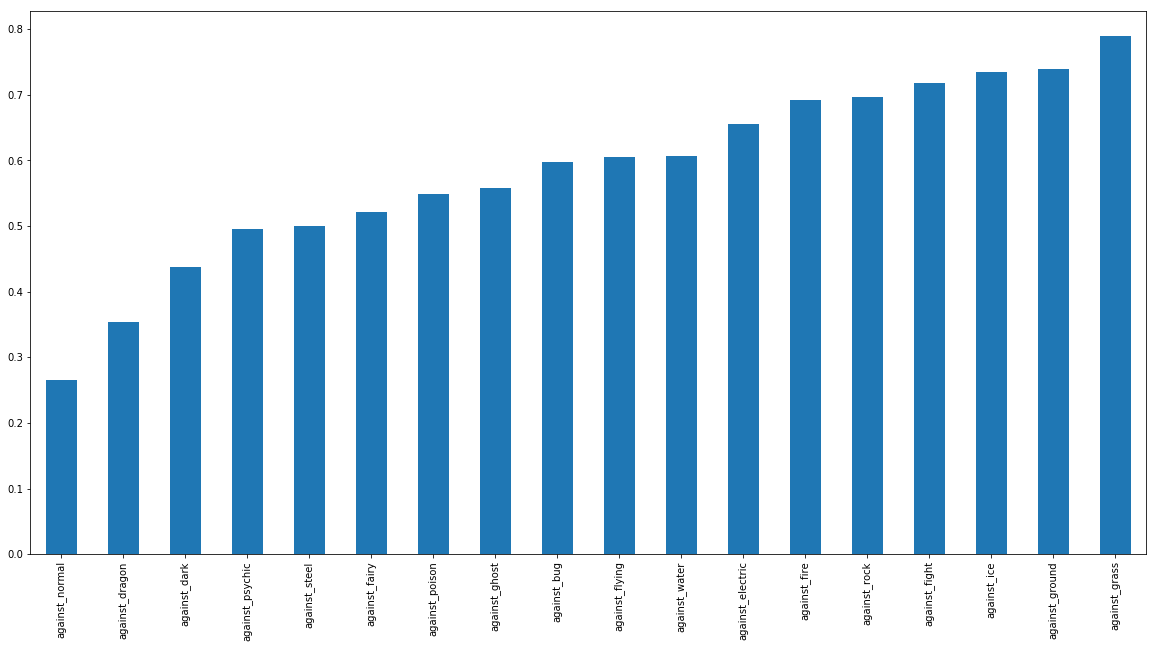

In [69]:
stdOfAdvantage.plot(kind="bar",figsize=(20,10))
plt.show()

By sorting and plotting the standard deviation of the class weaknesses, we can see how consistent the biases towards particular types of pokemon are. The normal pokemon have the smallest standard deviation, as most pokemon have neither a weakness nor strength over them. 

## How to select columns from the dataframe. 

In [65]:
pokeData["name"]

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
8       Blastoise
9        Caterpie
10        Metapod
11     Butterfree
12         Weedle
13         Kakuna
14       Beedrill
15         Pidgey
16      Pidgeotto
17        Pidgeot
18        Rattata
19       Raticate
20        Spearow
21         Fearow
22          Ekans
23          Arbok
24        Pikachu
25         Raichu
26      Sandshrew
27      Sandslash
28       Nidoran♀
29       Nidorina
          ...    
771    Type: Null
772      Silvally
773        Minior
774        Komala
775    Turtonator
776    Togedemaru
777       Mimikyu
778       Bruxish
779        Drampa
780      Dhelmise
781      Jangmo-o
782      Hakamo-o
783       Kommo-o
784     Tapu Koko
785     Tapu Lele
786     Tapu Bulu
787     Tapu Fini
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xu

## Question: Does the length of the name influence weight? 
Are fatter pokemon given larger names? 


In [106]:
nameLen = pokeData["name"].apply(len)
pokeData = pokeData.assign(nameLength=nameLen)
pokeData.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,nameLength
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,9
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0,7
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0,8
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0,10
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0,10


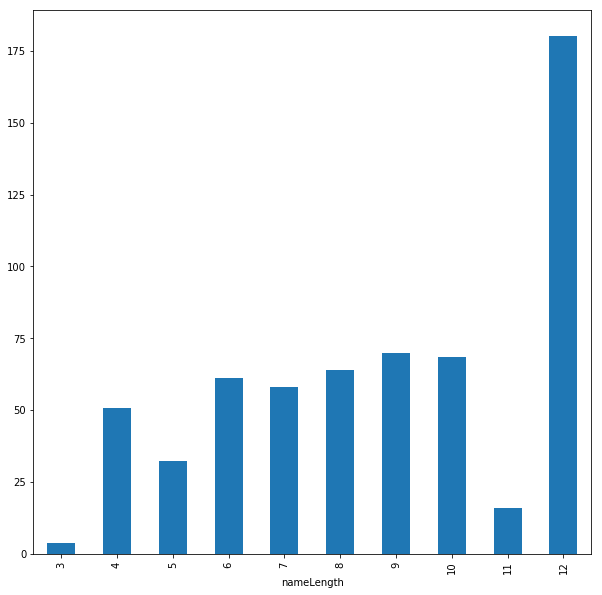

In [131]:
pokeData.groupby("nameLength").mean()["weight_kg"].plot(kind="bar",figsize=(10,10))
plt.show()

### It does seem like there is some descrimination.

<img src="https://sociorocketnewsen.files.wordpress.com/2016/01/squirtlecrying.gif">

### But wait, how many pokemon have 12 letters in their name?

In [121]:
pokeData.loc[pokeData["nameLength"]==12]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,nameLength
739,"['Hyper Cutter', 'Iron Fist', 'Anger Point']",0.5,0.5,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,132,5120,70,478,60,Woolly Crab Pokémon,77,1000000,1.7,97,Kekenkaniケケンカニ,Crabominable,50.0,740,62,67,43,fighting,ice,180.0,7,0,12


There's only one Pokemon with 12 letters in their name. Namely, this dude: 
<img src="https://cdn.bulbagarden.net/upload/1/17/740Crabominable.png">

It turns out there isn't really a bias when you consider the number of pokemon in each name length group. 

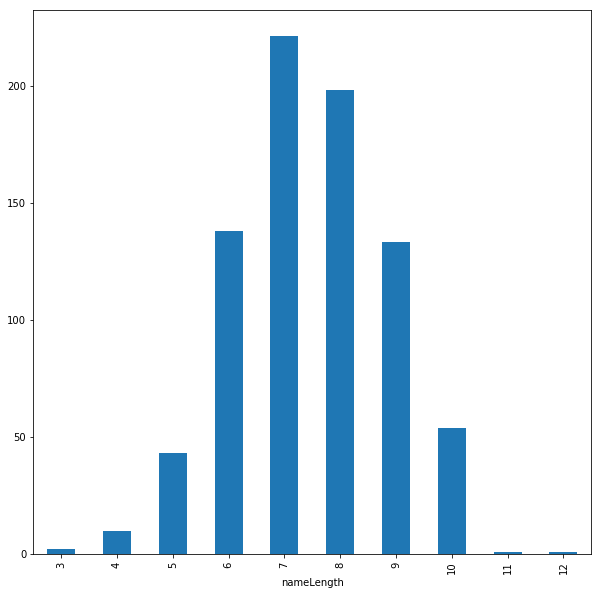

In [130]:
pokeData.groupby("nameLength").size().plot(kind="bar",figsize=(10,10))
plt.show()

Look what we have here... a seemingly normal distribution with a mean around the center of the range of name lengths. 

# I choose you!  
It's now your turn to figure out some interesting features of the data. Try to answer the authors questions listed above or figure out new things. 